# Pandas Test - Real life Exercise

In [272]:
import pandas as pd

For visualizations:

In [273]:
%pip install plotly_express


In [274]:
! pip install cufflinks

In [275]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px


## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [276]:
ad_df = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
139170,2021-week_42,AD07NRLQ8G,RelayFoods,JP,yes,NaN,Qality,DNNQ
185281,2021-week_45,AD07FN8GGM,Tab Solutions,US,yes,NaN,Qality,RNNQ
150927,2021-week_43,AD08F8SYJ6,Search Million Culture,IN,yes,NaN,Qality,UserPopQ
356166,2022-week_06,AD08NPPGH9,Extreme DA,US,yes,NaN,Yield,ManualQ
13582,2021-week_33,AD07M8S7L8,Extreme DA,US,yes,NaN,Yield,DNNY


In [277]:
most_pop_ad = ad_df.ad_id.value_counts().idxmax()

In [278]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [279]:
ad_df.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [280]:
#1. Add a column with the sample year
ad_df['year']=ad_df.week_id.str[:4]
ad_df.year.head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year, dtype: object

In [281]:
#1. Add a column with the sample quarter (google how to)
ad_df['week']=ad_df.week_id.str[-2:]
ad_df.week.head()

0    33
1    33
2    33
3    33
4    33
Name: week, dtype: object

In [282]:
ad_df['week']=ad_df['week'].astype(int)

In [283]:
ad_df['qurter']= (  (ad_df['week']-1)  //13)+1
ad_df.qurter.head()


0    3
1    3
2    3
3    3
4    3
Name: qurter, dtype: int32

In [284]:
ad_df.qurter.value_counts()

4    186900
3    100645
1     86243
Name: qurter, dtype: int64

In [285]:
#1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. 
#Check that indeed the new column contaion no NaNs. 


In [286]:
ad_df['new_sucecss']=(ad_df.is_success == 'yes').astype(int)

In [287]:
ad_df.new_sucecss.value_counts()

1    304206
0     69582
Name: new_sucecss, dtype: int64

In [288]:
ad_df.is_sever.isnull().any()

True

In [289]:
ad_df.is_sever.isnull().sum()

304195

In [290]:
ad_df['New_is_sever']=ad_df.is_sever.fillna('False').astype('bool')

In [291]:
ad_df.New_is_sever.value_counts()

True     348884
False     24904
Name: New_is_sever, dtype: int64

In [292]:
#1. Capitlize (first letter only) the is_success column (Inplace)

In [293]:
ad_df.is_success = ad_df.is_success.str.capitalize()
ad_df.is_success.value_counts()


Yes    304206
No      69582
Name: is_success, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [294]:
#1. How many requests are there in US region? 

In [295]:
aaaa=ad_df.groupby(['region'])
aaaa['region'].value_counts().loc['US']


region
US    103846
Name: region, dtype: int64

In [296]:
#2. How many **successful** requests are there in US region? 


In [297]:
aaaa=ad_df.is_success=='Yes'
temp=ad_df.loc[aaaa]
temp[temp.region=='US'].shape[0]


88918

In [298]:
3#. How many **successful** requests are there in US region, on week 52?
aaaa=(ad_df.is_success=='Yes') & (ad_df.week==52)
temp=ad_df.loc[aaaa]
temp[temp.region=='US'].shape[0]

3342

In [299]:
#1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
aaaa=(ad_df.rec_provider=='DNNQ') | (ad_df.rec_provider=='RNNY') | (ad_df.rec_provider=='UserPopQ') 
temp=ad_df.loc[aaaa]

In [300]:
temp.shape[0]

200093

In [301]:
#1. How many requests where delivered by rule based providers? 


In [302]:
#1. Select only the requests from 2021 - How many are there? 
aaaa=ad_df.yaer=='2021'
temp=ad_df.loc[aaaa].shape[0]


AttributeError: 'DataFrame' object has no attribute 'yaer'

In [303]:
#1. Select the reqeusts from week 30 to week 40 - How many are there? 
temp_df=ad_df.set_index('week')
temp_df.loc[33:40]
temp_df.loc[33:40].shape[0]


115051

In [304]:
#1. Select all the data that comes from the most popular 
aaaa=ad_df.groupby(['ad_id'])
aaaa['ad_id'].count().sort_values(ascending=False)



ad_id
AD07PFFMP9    247
AD098SWYF6    239
AD08C8RR8J    138
AD0886VY87     99
AD08888888     96
             ... 
AD07KR8PNY      1
AD07KR8QJ8      1
AD07KR8QSQ      1
AD07KR8QWZ      1
AD07ZFY86L      1
Name: ad_id, Length: 300727, dtype: int64

In [305]:
#1. Select all the data that comes from the least popular provider
aaaa=ad_df.groupby(['rec_provider'])
aaaa['rec_provider'].count().sort_values(ascending=True)


rec_provider
UserPopSelectionY        21
RuleBased               182
BooksQ                 1720
ManualY                1982
UserPopSelectionQ      2417
BooksY                 4150
XGBY                   4276
XGBQ                  12250
RNNY                  12732
ManualQ               13844
RNNQ                  20983
RuleBasedY            28154
UserPopY              38600
DNNY                  45116
UserPopQ              69937
DNNQ                 117424
Name: rec_provider, dtype: int64

In [306]:
aaaa=ad_df.rec_provider=='UserPopSelectionY' 
ad_df.loc[aaaa]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,qurter,new_sucecss,New_is_sever
352263,2022-week_06,AD0088UP8R,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352326,2022-week_06,AD09C8KC8Z,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352578,2022-week_06,AD078DT6GJ,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352595,2022-week_06,AD09C8P789,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352703,2022-week_06,AD00UF8VOF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352714,2022-week_06,AD098CXHRF,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352738,2022-week_06,AD0086GLW0,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352740,2022-week_06,AD08QMJ888,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352745,2022-week_06,AD07H9GM98,MoJoe Brewing Company,JP,Yes,NaN,Yield,UserPopSelectionY,2022,6,1,1,True
352803,2022-week_06,AD09G9YKC8,MoJoe Brewing Company,JP,No,False,Yield,UserPopSelectionY,2022,6,1,0,False


In [307]:
#1. Select the data in which is_sever is None. How big is it? 
aaaa=ad_df['is_sever'].isna()
ad_df.loc[aaaa].shape[0]

304195

In [308]:
#1. Select the data in which the requester is a 3 word company
aaaa=ad_df['requester'].str.split().apply(len)==3
ad_df.loc[aaaa].shape[0]

118141

In [309]:
#1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
aaaa=(ad_df['requester'].str.split().apply(len)==3) & (ad_df['ad_id'].str.contains("6"))
ad_df.loc[aaaa].shape[0]

24197

In [310]:
#1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [311]:
 def is_prod_bigger_than_30(ad_id):
    digits= [int(c) for c in ad_id if c.isdigit()]
    prod=1
    for d in digits:
        prod*=d
    return prod>30

In [312]:
aa=a= (ad_df['requester'].str.split().apply(len)==3) & (ad_df.ad_id.apply(is_prod_bigger_than_30) )
ad_df.loc[aaaa]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,week,qurter,new_sucecss,New_is_sever
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
11,2021-week_33,AD88967068,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
41,2021-week_33,AD07L6JC8W,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,33,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373364,2022-week_52,AD06XJR86M,MoJoe Brewing Company,US,Yes,NaN,Yield,RuleBasedY,2022,52,4,1,True
373394,2022-week_52,AD08Y6R9WV,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,52,4,1,True
373511,2022-week_52,AD09C68T8Y,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,52,4,1,True
373691,2022-week_52,AD08M86WW8,MoJoe Brewing Company,US,Yes,NaN,Yield,DNNY,2022,52,4,1,True


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
2. How many regions available in the data? Are there any missing weeks per region? 
3. How many ads are being sent to annotation in each region per week?
4. How many None values are there in is_sever column? 
5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
6. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
7. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
8. Per each region, What is the Quality/Yield traffic proportion WoW? 
9. How many different reqeusters are there? 
10. Which are the different rec_proivders?
11. Are there different rec providers per region? 
12. Are there different rec providers per rec type?
13. What are the notation rules distinguishing between quality vs yielding providers?
14. Which is the most successful region of operation? 
15. Which is the most successful rec provider per each region? 
16. Present a table with a success rate, sever defects rate and CI (for each metric) per region
17. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
18. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
19. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
21. Present WoW table/graph with success rate and CI (see image below) per region
22. Present WoW table/graph with success rate and CI (see image below) per region and rec type
23. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
24. Which are the requester to which we succeed the most?
25. Which are the requester to which we produce the most critical defects?
26. What is the overall success rate trend over time? 
27. What is the overall sever defect rate trend over time? 
28. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  29. Identify major traffic shape changes (addition/removal) of major clients
30. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  31. Identify major traffic shape changes (addition/removal) of major clients


In [246]:
#1. How many weeks available in the data? Are there any missing weeks? 
ad_df.week.unique()

array([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51,  1,  2,  3,  4,  5,  6, 52])

In [248]:
#2. How many regions available in the data? Are there any missing weeks per region? 
ad_df.region.unique()

array(['DE', 'GB', 'IN', 'JP', 'US'], dtype=object)

In [249]:
aaa = ad_df.groupby("region")["week"]

In [253]:
#3. How many ads are being sent to annotation in each region per week?
ad_df.groupby(['region','week','recommendation_type']).ad_id.count()


region  week  recommendation_type
DE      1     Qality                 2026
              Yield                   376
        2     Qality                 2027
              Yield                   367
        3     Qality                 1881
                                     ... 
US      50    Yield                  2126
        51    Qality                 1208
              Yield                  2788
        52    Qality                 1299
              Yield                  2699
Name: ad_id, Length: 258, dtype: int64

In [48]:
#4. How many None values are there in is_sever column? 
ad_df.is_sever.isnull().sum()


304195

In [319]:
#5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
max_ad = ad_df.groupby(["ad_id","week"])["week"].value_counts().idxmax()

ad_df.groupby(["ad_id","week"])["week"].count().sort_values(ascending=True).head(1)


ad_id       week
AD00000088  37      1
Name: week, dtype: int64

In [50]:
 6Are there ads that are being sent in more than one week?
#   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
 #  2. What are the weeks that the ad from above was sent in? 
  # 3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
group_by_carrier = ad_df.groupby(['ad_id','week'])
group_by_carrier.ad_id.size()



ad_id       week
AD00000088  37      1
AD000000WF  3       1
AD00000876  34      1
AD00000888  2       1
            43      1
                   ..
AD98988898  5       1
            43      1
AD99798888  42      1
ADOO8X898E  41      1
            50      1
Name: ad_id, Length: 358763, dtype: int64

In [254]:
#Are there ads that are being sent in more than one week?
aaa = ['ad_id', 'week']
temp=ad_df[ad_df.duplicated(aaa)].groupby(aaa).size().reset_index(name='Duplicates')
temp.query('Duplicates > 1')


,ad_id,week,Duplicates
5,AD000088DW,3,2
17,AD0000C78C,39,2
18,AD0000C78C,40,2
19,AD0000C78C,42,2
20,AD0000C78C,52,3
...,...,...,...
9141,AD88967096,3,2
9156,AD89888888,34,2
9160,AD89888888,42,2
9163,AD89888889,35,2


In [ ]:
#Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
ad_df.groupby(['ad_id','week']).agg(lambda x: x.value_counts().index[0])


In [ ]:
#7.When is_sever is None, what is the number of successful requests? 
aaaa=ad_df['is_sever'].isna()
df=ad_df.loc[aaaa]
df.is_success.value_counts()


In [52]:
#8. Per each region, What is the Quality/Yield traffic proportion WoW? 
temp=ad_df.groupby(['region', 'recommendation_type']).size()
percentage=temp.groupby(level=0).apply(lambda x:100*x/(x.sum()))
print(percentage)


region  recommendation_type
DE      Qality                 80.890040
        Yield                  19.109960
GB      Qality                 83.634195
        Yield                  16.365805
IN      Qality                 49.128124
        Yield                  50.871876
JP      Qality                 85.206717
        Yield                  14.793283
US      Qality                 39.051095
        Yield                  60.948905
dtype: float64


In [256]:
#9. How many different reqeusters are there? 
ad_df.requester.unique().size


36

In [257]:
#Which are the top 5 requesters per region?
ad_df.groupby(['region']).apply(lambda g:g.requester.value_counts().head(5))


region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

In [320]:
#  Which are the different rec_proivders?
ad_df.rec_provider.unique()


array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [262]:
# Are there different rec providers per region?
ad_df.groupby([ 'region']).apply(lambda g:g.rec_provider.unique())


region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
dtype: object

In [321]:
#12. Are there different rec providers per rec type?
ad_df.groupby("region")['rec_provider'].nunique()


region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

In [322]:
#13. What are the notation rules distinguishing between quality vs yielding providers?
ad_df.groupby(["region",'recommendation_type' ])["rec_provider"].nunique()


region  recommendation_type
DE      Qality                 5
        Yield                  6
GB      Qality                 7
        Yield                  7
IN      Qality                 4
        Yield                  4
JP      Qality                 5
        Yield                  6
US      Qality                 8
        Yield                  8
Name: rec_provider, dtype: int64

In [58]:
#14. Which is the most successful region of operation? 


In [59]:
#15. Which is the most successful rec provider per each region? 
#aaa=ad_df.groupby('region').apply(lambda c: c.rec_provider.value_counts() .head(1))



region  rec_provider     
DE      BooksQ                2.176046
        BooksY                2.021648
        DNNQ                 52.162375
        DNNY                  8.712225
        ManualQ               1.556846
        ManualY               0.973029
        RuleBasedY            2.595815
        UserPopQ             24.412564
        UserPopY              5.389453
GB      DNNQ                 47.810421
        DNNY                  8.764340
        ManualQ               2.595681
        ManualY               0.666394
        RNNQ                 13.700231
        RNNY                  1.865420
        RuleBased             0.048202
        RuleBasedY            2.228140
        UserPopQ              8.171455
        UserPopY              1.978695
        XGBQ                 11.009351
        XGBY                  1.161670
IN      ManualQ               6.365298
        ManualY               0.270582
        RuleBased             0.008418
        RuleBasedY           16.964908

In [61]:
#16. Present a table with a success rate, sever defects rate and CI (for each metric) per region


region  rec_provider     
DE      BooksQ                2.176046
        BooksY                2.021648
        DNNQ                 52.162375
        DNNY                  8.712225
        ManualQ               1.556846
        ManualY               0.973029
        RuleBasedY            2.595815
        UserPopQ             24.412564
        UserPopY              5.389453
GB      DNNQ                 47.810421
        DNNY                  8.764340
        ManualQ               2.595681
        ManualY               0.666394
        RNNQ                 13.700231
        RNNY                  1.865420
        RuleBased             0.048202
        RuleBasedY            2.228140
        UserPopQ              8.171455
        UserPopY              1.978695
        XGBQ                 11.009351
        XGBY                  1.161670
IN      ManualQ               6.365298
        ManualY               0.270582
        RuleBased             0.008418
        RuleBasedY           16.964908

In [62]:
#17. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider


In [323]:
#18. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
ad_.groupby('rec_provider')[['success_yes','sever_yes']].apply(lambda x : (100*x.sum()/x.count()))


KeyError: "Columns not found: 'sever_yes', 'success_yes'"

In [ ]:
#19. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)


In [ ]:
#20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region


In [ ]:
#21. Present WoW table/graph with success rate and CI (see image below) per region


In [270]:
#22. Present WoW table/graph with success rate and CI (see image below) per region and rec type


In [271]:
#23. Present WoW table/graph with success rate and CI (see image below) per region and rec provider



In [ ]:
#24. Which are the requester to which we succeed the most?


In [ ]:
#25. Which are the requester to which we produce the most critical defects?


In [ ]:
#26. What is the overall success rate trend over time? 


In [ ]:
#27. What is the overall sever defect rate trend over time? 


In [ ]:
#28. Preset a WoW graph showing the number of requests per customer in each region 
#(hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:


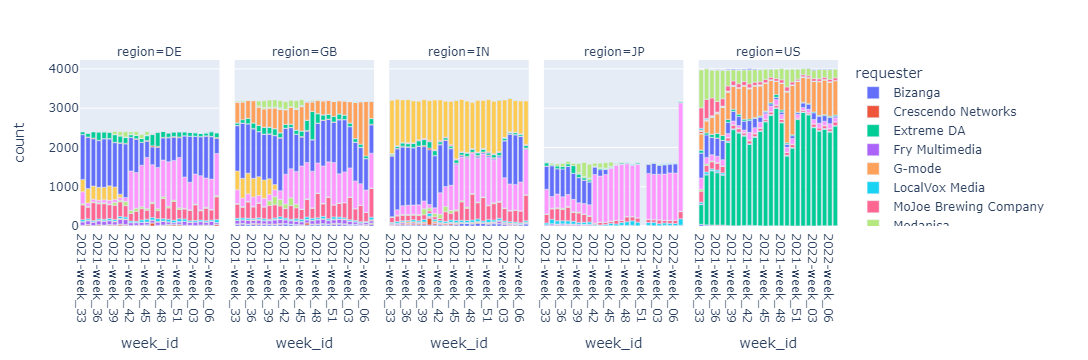

In [329]:
#  29. Identify major traffic shape changes (addition/removal) of major clients
identification=ad_df.groupby(['week_id','region','requester'])['ad_id'].count().rename('count').reset_index()
px.bar(identification, x='week_id', y='count', color = 'requester',facet_col='region')

In [ ]:
#30. Preset a WoW graph showing the **requests proportion** per customer in each region 
#(hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:


#  31. Identify major traffic shape changes (addition/removal) of major clients

In [ ]:
Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [172]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

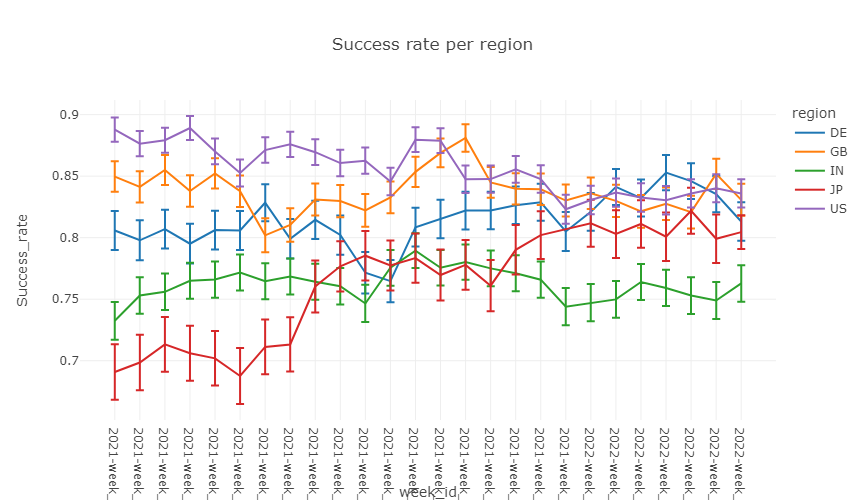

In [324]:
ad_df.to_excel('ad_shimon.xlsx')

Produce the following requestser proportion graph:

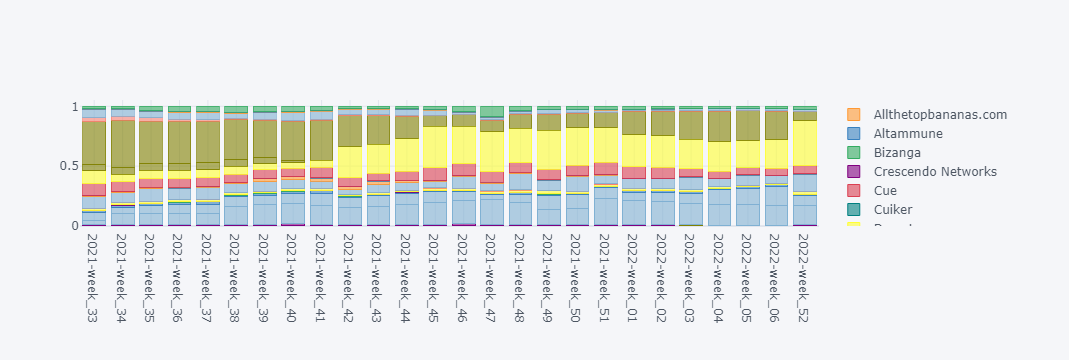

## Appendix

Code to create weekly files:

In [ ]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)

NameError: name 'ad_recs_annotated' is not defined